# Slalom

Na kolesarski stezi na Večni poti so se te dni pojavile nove ovire.

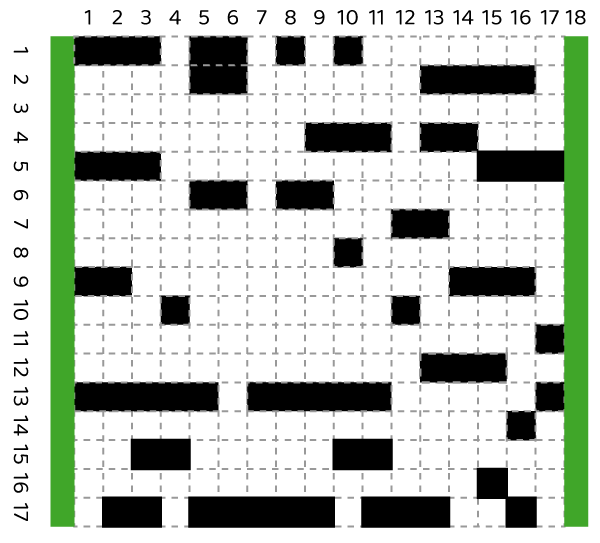

Na Oddelek za gospodarstvo in motorni promet MOL smo vprašali, če niso tokrat morda vendarle pretiravali, saj je tole nemogoče zvoziti. Prejeli smo naslednji izgovor:

---

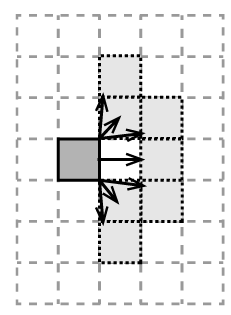

*Skrb za varnost kolesarjev je prioriteta našega oddelka. (Pomembnejša nam je samo še čim večja pretočnost motornega prometa in zadostno število parkirišč.) Ovire na kolesarski poti pa niso namenjene zgolj varnosti kolesarjev, temveč tudi vevericam.*

*Te prikupne male živalice morajo nekako prečkati kolesarsko pot. Ker pa se bojijo hoditi po tleh, to počnejo tako, da skačejo iz ovire na oviro.*

- *Po vsaki oviri, na katero pride, steče na desno, čisto do konca ovire.*
- *Nato se ozre po primerni oviri, na katero lahko skoči. Veverice vedno skačejo na polja, ki so desno od trenutnega. Nikoli torej skočijo na polje, ki je nad ali pod trenutnim, ali celo na polje, ki je levo.*
- *Veverica lahko skoči eno enoto daleč. Pri tem lahko skoči iz vogala na vogal. Možni skoki so na sliki.*
- *Da prečka kolesarsko, mora priti do ovire, ki se dotika desnega roba kolesarske ali pa je od njega oddaljena eno polje, saj lahko veverica le-to preskoči.*

*Na MOL se zavzemamo za strpno sobivanje vseh soudeležencev v prometu, vključno z vevericami.*

----



## Obvezna naloga

Ovire so tokrat podane v preprostem seznamu trojk `(y, x0, x1)`. Takšne oblike smo že vajeni.

Tokrat bomo izjemoma poenostavili argumente funkcij tako, da seznam ovir ne bo podan kot argument funkcije, temveč bo zapisan v globalnem seznamu z imenom `ovire`.

Napiši naslednje funkcije:

- `mozen_skok(x, y, ovira)` vrne `True`, če lahko veverica, ki je na polju `x, y`, skoči na podano oviro. Če skok ni možen, vrne `False`. (Ta funkcija naj **ne** uporablja seznama `ovire` - ker ga nima za kaj rabiti).

    Ta funkcija je sicer čisto kratka, a je lahko presenetljivo zoprna. Testi se jo trudijo temeljito pretestirati, vseeno pa je možno, da bodo spregledali kako napako, ki se bo lahko izkazala šele v prihodnjih funkcijah.

- `mozne_ovire(x, y)` prejme koordinate nekega polja, na katerem se nahaja veverica. Funkcija vrne vse ovire iz seznama `ovire`, na katere lahko skoči. (Ne vznemirjaj se, če to polje morda ni na nobeni oviri.)

- `obstaja_pot(ovira)` vrne `True`, če lahko veverica, ki se nahaja na podani oviri, prečka kolesarsko stezo. Če pot ni možna, naj vrne `False`. Polje bo morda na kaki oviri na levi strani, morda pa bo že sredi kolesarske. Ovira je podana kot terka `(y, x0, x1)`.

Toplo priporočam, da zadnjo funkcijo napišete rekurzivno, saj bo tako veliko lažje, kot če poskušate kaj drugega. Prvi dve pa naj bosta "normalni".



### Rešitev

`mozen_skok` ni višek programerske umetnosti, samo malo zoprna zna biti. Tule je nekaj možnih rešitev.

In [1]:
def mozen_skok(x, y, ovira):
    yo, x0, x1 = ovira
    return yo in (y - 2, y + 2) and x0 <= x + 1 <= x1 \
        or yo in (y - 1, y + 1) and (x0 <= x + 1 <= x1 or x0 <= x + 2 <= x1) \
        or yo == y and x0 == x + 2

def mozen_skok(x, y, ovira):
    yo, x0, x1 = ovira
    for dx, dy in ((1, -2), (1, -1), (2, -1), (2, 0), (2, 1), (1, 1), (1, 2)):
        if y + dy == yo and x0 <= x + dx <= x1:
            return True

def mozen_skok(x, y, ovira):
    return any(y + dy == ovira[0] and ovira[1] <= x + dx <= ovira[2]
               for dx, dy in ((1, -2), (1, -1), (2, -1), (2, 0), (2, 1), (1, 1), (1, 2)))

`mozne_ovire` mora zgolj čez seznam ovir in nabrati vse tiste, za katere `mozen_skok` pravi, da je nanje možno skočiti. Vsaka rešitev, drugačna od spodnje, bi bila slaba za karmo.

In [2]:
def mozne_ovire(x, y):
    return [ovira for ovira in ovire if mozen_skok(x, y, ovira)]

Zdaj pa še najpomembnejša funkcija, `obstaja_pot`. Če smo na koncu, smo zmagali in vrnemo `True`. Sicer gremo po vseh ovirah, na katere je možnost skočiti iz trenutne. Ko med njimi naletimo na takšno, s katere je možna pot do konca, vrnemo `True`. Če takšne ni, pa vrnemo `False`.

In [3]:
def obstaja_pot(ovira):
    y, _, x1 = ovira
    if x1 >= 16:
        return True
    for ovira in mozne_ovire(x1, y):
        if obstaja_pot(ovira):
            return True
    return False

Ali, krajše

In [4]:
def obstaja_pot(ovira):
    y, _, x1 = ovira
    return x1 >= 16 or any(obstaja_pot(ovira) for ovira in mozne_ovire(x1, y))

Naloga je pravzaprav enaka nalogi, v kateri nas je zanimalo, ali v rodbini določene osebe obstaja oseba s podanim imenom.

## Dodatna naloga

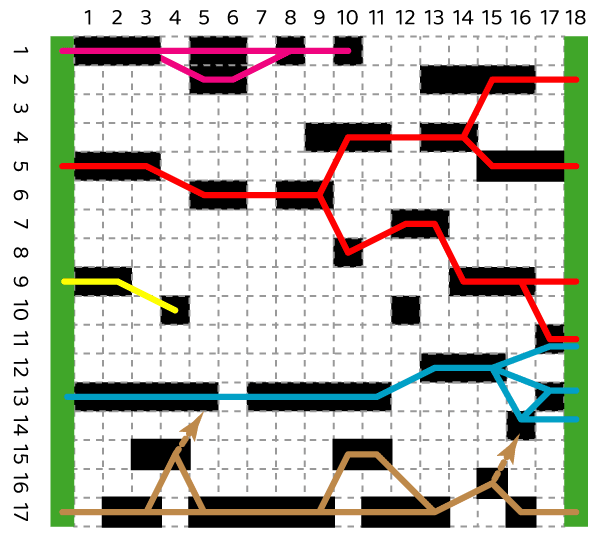

Veverica ima na koncu ovire pogosto izbiro, kam skočiti naprej.

Napiši funkcijo `stevilo_poti(ovira)`, ki pove, na koliko načinov lahko veverica, ki stoji na podani oviri, doseže desno stran kolesarske, to je, na koliko načinov lahko pride do kake ovire, ki se bodisi drži desnega roba bodisi je od njega oddaljena za 1. Če pot ni možna, seveda vrne 0.

Nekaj primerov je na sliki. Upoštevaj, da obsega modra pot štiri načine (od kateri se dva končata na istem mestu).

Rjava pot pokriva 16 načinov:

- Do ovire (16, 17) lahko pride na 4 načine (tako da gre naravnost, naredi drugi ovinek, naredi prvi ovinek ali pa naredi oba ovinka).
- Tudi do ovire (15, 16) pride na štiri načine. Če gre odtod na modro pot, se vsak od teh nadaljuje na dva načina, kar bo torej naneslo, skupno, 8 načinov.
- Če pa že v začetku krene gor, na modro, se to konča s 4 možnimi načini.

Tale opis samo kaže, kako je treba razumeti število načinov. Pri programiranju najbrž ne bo potrebno ničesar množiti, temveč samo seštevati. Rešitev je skoraj enaka rešitvi obvezne naloge.

### Rešitev

In [5]:
def stevilo_poti(ovira):
    y, _, x1 = ovira
    return (x1 >= 16) + sum(stevilo_poti(ovira2) for ovira2 in mozne_ovire(x1, y))

`x1 >= 16` je `True`, kar je isto kot `1`, če je s te ovire možno skočiti na konec, in `False` (`0`), če ni. Izraz `x1 >= 16)` mora biti v oklepaju, ker ima seštevanje prednost pred `>=`.

K temu je potrebno prišteti število poti, ki vodijo z ovir, na katere je možno skočiti s trenutne.

Prav, prav, napišimo še daljšo varianto.

In [6]:
def stevilo_poti(ovira):
    y, _, x1 = ovira
    poti = 0
    if x1 >= 16:
        poti += 1
    for naprej in mozne_ovire(x1, y):
        poti += stevilo_poti(naprej)
    return poti

Tole je zelo podobno nalogi, v kateri nas je zanimala velikost rodbine določene osebe. Ali, če hočete, prejšnji nalogi. Tako ali tako je to vse eno in isto.